In [1]:
from skimage.color import rgb2hsv
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
import seaborn as sns
import pickle as pkl
import cv2
from matplotlib import pyplot
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import SpatialDropout2D
from contextlib import redirect_stdout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import copy
import time
import training_models
import types
import inspect

Using TensorFlow backend.


In [2]:
# double checking to ensure gpu is enabled for training
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
cwd = os.getcwd()

In [4]:
os.listdir(cwd+ '\\color_data')

['count_.csv', 'frames']

In [5]:
target = pd.read_csv(cwd + '\\data\\count_.csv', names=['target'])

In [6]:
target.head()

,target
0,29
1,30
2,35
3,31
4,26


In [7]:
input_ = np.append(pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_1.pkl', 'rb')),
                  pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_2.pkl', 'rb')), axis=0)

In [8]:
model_location = 'C:\\Users\\abelp\\machine_learning\\crowd_count\\models\\'

In [9]:
os.listdir(model_location)

['alex_net_trasfer.h5',
 'alex_net_trasfer.png',
 'alex_net_trasfer_deep.h5',
 'alex_net_trasfer_deep.png',
 'alex_net_trasfer_deep_BE.h5',
 'alex_net_trasfer_deep_BE.png',
 'alex_net_trasfer_deep_BE_LR.h5',
 'alex_net_trasfer_deep_BE_LR.png',
 'alex_net_trasfer_v2.h5',
 'alex_net_trasfer_v2.png',
 'augmented_samplealex_net_trasfer_deep_BE_LR.png',
 'augmented_samplealex_net_trasfer_v2.png',
 'augmented_samplebasic_CNN_v2_BN.png',
 'basic_CNN.h5',
 'basic_CNN.png',
 'basic_CNN_v2.h5',
 'basic_CNN_v2.png',
 'basic_CNN_v2_BN.h5',
 'basic_CNN_v2_BN.png',
 'basic_CNN_v2_DO.h5',
 'basic_CNN_v2_DO.png']

In [10]:
IMG_SIZE = input_.shape[1]
IMG_SIZE2 = input_.shape[2]

In [11]:
models_ = training_models.models_to_train

In [12]:
target = np.array(target['target'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(input_, target, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(1600, 480, 640)

In [15]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [16]:
X_train.shape

(1600, 480, 640, 1)

In [17]:
del input_

In [18]:
val_loss_dict = {}

In [19]:
def data_Generator():
    while True:
        for i in range(0,len(X_train) // 100):
            time.sleep(0.01)
            yield  X_train[i*25:(i+1)*25], y_train[i*25:(i+1)*25]
            
def train_model(method):        
    filepath = model_location + method + '.h5'
    
    es_callback = EarlyStopping(monitor='mse', patience=4)
    checkpoint = ModelCheckpoint(filepath, monitor='val_mse', save_best_only=True, mode='min')
    
    model = getattr(models_, method)(IMG_SIZE, IMG_SIZE2)

    model.compile(optimizer='ADAM', loss='mse', metrics=['mse'])

    with open('C:\\Users\\abelp\\machine_learning\\crowd_count\\model_summary\\' + method + '_summary.txt', 'w') as f:
        with redirect_stdout(f):
            model.summary()
    
    history = model.fit_generator(data_Generator(), steps_per_epoch=25, epochs=500,  callbacks=[es_callback, checkpoint], verbose=1, validation_data=(X_test, y_test))
    
    val_loss_dict[method] = min(history.history['val_mse'])
    
    plt.figure()
    plt.plot(history.history['mse'][1:], label='train')
    plt.plot(history.history['val_mse'][1:], label='test')
    plt.title('train / test loss - ' + method)
    plt.savefig(model_location + method + '.png', transparent=True)
    
    del history
    del model

Epoch 1/500
25/25 [==============================] - 6s 256ms/step - loss: 460.5667 - mse: 460.5666 - val_loss: 53.7638 - val_mse: 53.7638
Epoch 2/500
25/25 [==============================] - 4s 175ms/step - loss: 47.7012 - mse: 47.7012 - val_loss: 78.6327 - val_mse: 78.6327
Epoch 3/500
25/25 [==============================] - 4s 174ms/step - loss: 32.2967 - mse: 32.2967 - val_loss: 15.7663 - val_mse: 15.7663
Epoch 4/500
25/25 [==============================] - 4s 169ms/step - loss: 10.2500 - mse: 10.2500 - val_loss: 26.2902 - val_mse: 26.2902
Epoch 5/500
25/25 [==============================] - 4s 168ms/step - loss: 11.0578 - mse: 11.0578 - val_loss: 20.7145 - val_mse: 20.7145
Epoch 6/500
25/25 [==============================] - 4s 169ms/step - loss: 12.8642 - mse: 12.8642 - val_loss: 24.9993 - val_mse: 24.9993
Epoch 7/500
25/25 [==============================] - 4s 168ms/step - loss: 17.5403 - mse: 17.5403 - val_loss: 37.2069 - val_mse: 37.2069
Epoch 8/500
25/25 [====================

25/25 [==============================] - 4s 177ms/step - loss: 803.9592 - mse: 803.9592 - val_loss: 790.5326 - val_mse: 790.5326
Epoch 12/500
25/25 [==============================] - 4s 165ms/step - loss: 764.5319 - mse: 764.5320 - val_loss: 743.0721 - val_mse: 743.0721
Epoch 13/500
25/25 [==============================] - 4s 165ms/step - loss: 705.4219 - mse: 705.4220 - val_loss: 688.4731 - val_mse: 688.4731
Epoch 14/500
25/25 [==============================] - 4s 165ms/step - loss: 656.3341 - mse: 656.3341 - val_loss: 627.0096 - val_mse: 627.0096
Epoch 15/500
25/25 [==============================] - 4s 173ms/step - loss: 585.3147 - mse: 585.3146 - val_loss: 560.0489 - val_mse: 560.0490
Epoch 16/500
25/25 [==============================] - 4s 171ms/step - loss: 522.7631 - mse: 522.7631 - val_loss: 489.2612 - val_mse: 489.2612
Epoch 17/500
25/25 [==============================] - 4s 165ms/step - loss: 450.2722 - mse: 450.2722 - val_loss: 417.3881 - val_mse: 417.3880
Epoch 18/500
25/25 

25/25 [==============================] - 4s 174ms/step - loss: 2.1047 - mse: 2.1047 - val_loss: 14.3493 - val_mse: 14.3493
Epoch 36/500
25/25 [==============================] - 4s 174ms/step - loss: 2.1510 - mse: 2.1510 - val_loss: 11.1239 - val_mse: 11.1239
Epoch 37/500
25/25 [==============================] - 4s 173ms/step - loss: 1.9752 - mse: 1.9752 - val_loss: 11.6482 - val_mse: 11.6482
Epoch 38/500
25/25 [==============================] - 4s 173ms/step - loss: 1.8773 - mse: 1.8773 - val_loss: 11.0103 - val_mse: 11.0103
Epoch 39/500
25/25 [==============================] - 4s 174ms/step - loss: 1.8330 - mse: 1.8330 - val_loss: 11.0935 - val_mse: 11.0935
Epoch 40/500
25/25 [==============================] - 4s 174ms/step - loss: 1.6072 - mse: 1.6072 - val_loss: 11.1530 - val_mse: 11.1530
Epoch 41/500
25/25 [==============================] - 4s 173ms/step - loss: 1.6357 - mse: 1.6357 - val_loss: 11.0509 - val_mse: 11.0509
Epoch 42/500
25/25 [==============================] - 4s 173m

Epoch 12/500
25/25 [==============================] - 5s 186ms/step - loss: 11.9149 - mse: 11.9149 - val_loss: 73.7489 - val_mse: 73.7489
Epoch 13/500
25/25 [==============================] - 5s 189ms/step - loss: 11.0618 - mse: 11.0618 - val_loss: 59.6715 - val_mse: 59.6715
Epoch 14/500
25/25 [==============================] - 5s 186ms/step - loss: 10.2806 - mse: 10.2806 - val_loss: 51.0857 - val_mse: 51.0857
Epoch 15/500
25/25 [==============================] - 5s 183ms/step - loss: 8.5572 - mse: 8.5572 - val_loss: 40.2485 - val_mse: 40.2485
Epoch 16/500
25/25 [==============================] - 5s 190ms/step - loss: 8.6612 - mse: 8.6612 - val_loss: 37.5456 - val_mse: 37.5456
Epoch 17/500
25/25 [==============================] - 5s 187ms/step - loss: 7.2646 - mse: 7.2646 - val_loss: 32.4781 - val_mse: 32.4781
Epoch 18/500
25/25 [==============================] - 5s 184ms/step - loss: 7.3203 - mse: 7.3203 - val_loss: 27.4918 - val_mse: 27.4918
Epoch 19/500
25/25 [======================

25/25 [==============================] - 7s 277ms/step - loss: 15.3789 - mse: 15.3789 - val_loss: 265.0353 - val_mse: 265.0353
Epoch 30/500
25/25 [==============================] - 7s 265ms/step - loss: 17.5425 - mse: 17.5425 - val_loss: 392.1707 - val_mse: 392.1707
Epoch 31/500
25/25 [==============================] - 7s 263ms/step - loss: 21.9386 - mse: 21.9386 - val_loss: 258.8440 - val_mse: 258.8441
Epoch 32/500
25/25 [==============================] - 7s 267ms/step - loss: 15.8717 - mse: 15.8717 - val_loss: 300.7959 - val_mse: 300.7959
Epoch 33/500
25/25 [==============================] - 7s 266ms/step - loss: 14.1969 - mse: 14.1969 - val_loss: 320.3009 - val_mse: 320.3009
Epoch 34/500
25/25 [==============================] - 7s 267ms/step - loss: 13.6168 - mse: 13.6168 - val_loss: 270.9483 - val_mse: 270.9483
Epoch 35/500
25/25 [==============================] - 7s 268ms/step - loss: 11.6192 - mse: 11.6192 - val_loss: 290.4924 - val_mse: 290.4924
Epoch 36/500
25/25 [=============

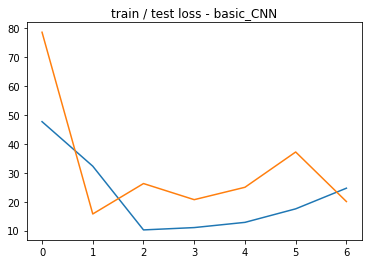

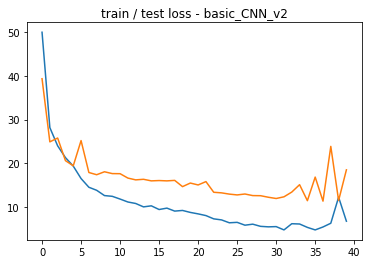

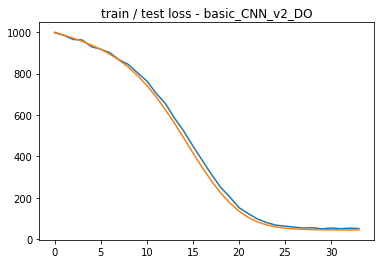

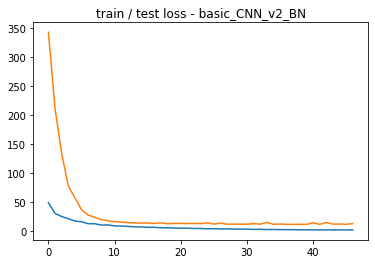

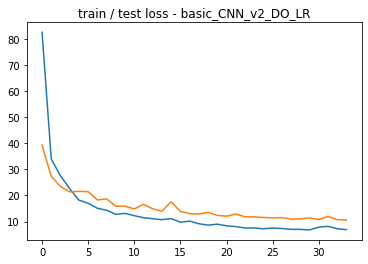

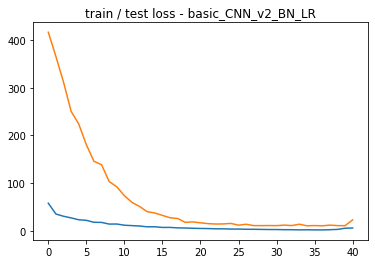

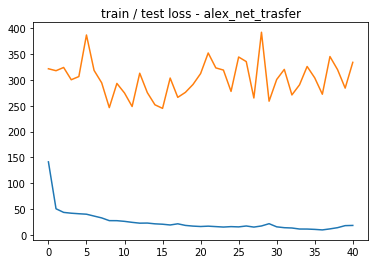

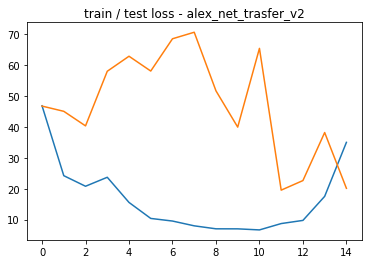

In [20]:
exec_methods = ["basic_CNN", "basic_CNN_v2", "basic_CNN_v2_DO", "basic_CNN_v2_BN","basic_CNN_v2_DO_LR", "basic_CNN_v2_BN_LR", "alex_net_trasfer", "alex_net_trasfer_v2"]
for method in exec_methods:
    train_model(method)

In [21]:
val_loss_dict

{'basic_CNN': 15.766340255737305,
 'basic_CNN_v2': 11.347467422485352,
 'basic_CNN_v2_DO': 44.412479400634766,
 'basic_CNN_v2_BN': 11.010293960571289,
 'basic_CNN_v2_DO_LR': 10.563013076782227,
 'basic_CNN_v2_BN_LR': 10.655610084533691,
 'alex_net_trasfer': 244.96600341796875,
 'alex_net_trasfer_v2': 19.525014877319336}